# SENG 474
# Assignment 2 - Problem 1
# Nolan Kurylo
# V00893175
To execute notebook, ensure ALL cells are run from top to bottom (since imports/df creation are only called once)


The neural network implemented in 1.2 makes use of the following formulas:

Sigmoid
$$
\sigma(x) = \frac{1}{1 + e^{-x}} 
$$

Sigmoid Gradient
$$
\sigma'(x) = \sigma(x)(1 - \sigma(x))
$$

Softmax
$$
f(x)_i =  \frac{e^{x_i}}{ \sum_j e^{x_j} }
$$

Softmax Gradient (assuming i = j)
$$
f(x)_i' =  f(x)_i(1 - f(x)_i)
$$


References (these were also used for most of the following problems):


1) https://mmuratarat.github.io/2019-01-27/derivation-of-softmax-function
 
2) https://towardsdatascience.com/mnist-handwritten-digits-classification-from-scratch-using-python-numpy-b08e401c4dab

3) https://mlfromscratch.com/neural-network-tutorial/#/

4) https://keras.io/api/

5) https://keras.io/examples/vision/mnist_convnet/

6) https://machinelearningmastery.com/grid-search-hyperparameters-deep-learning-models-python-keras/


# 1.1 Derivative

The softmax activation function is:
$$
f(x)_i =  \frac{e^{x_i}}{ \sum_j e^{x_j} }
$$

The derivative of the softmax activation function is calculated using the Quotient Rule:

When 
$$
f(x) = \frac{g(x)}{h(x)}
$$
Then
$$
f'(x) = \frac{g'(x)h(x) - g(x)h'(x)}{h'(x)^2}
$$

So in the case of the softmax activation function given above:

$$
g(x) = e^{x_i}
$$
$$
h(x) = \sum_j e^{x_j}
$$
$$
g'(x) = \frac{d}{dx_j}(e^{x_i}) = \frac{d}{dx_i}(e^{x_i}) \frac{dx_i}{dx_j}(x_i) = \begin{cases}e^{x_i} & i = j\\0 & i  \neq  j\end{cases} 
$$
$$
h'(x) = \frac{d}{dx_j}(\sum_j e^{x_j}) = \frac{d}{dx_j}( e^{x_j}) + \frac{d}{dx_j}(\sum_{i\neq j} e^{x_i}) = e^{x_j} + 0 = e^{x_j}
$$

So now there are two cases when finding the derivative f'(x):


$$
Case\ 1:\ i \neq j
$$
$$
f'(x) = \frac{(0)(\sum_j e^{x_j}) - (e^{x_i})(e^{x_j})}{(\sum_j e^{x_j})^2} = \frac{- e^{x_i}e^{x_j}}{(\sum_j e^{x_j})^2} = -f(x)_if(x)_j
$$
And
$$
Case\ 2:\ i = j
$$
$$
f'(x) = \frac{(e^{x_i})(\sum_j e^{x_j}) - (e^{x_i})(e^{x_j})}{(\sum_j e^{x_j})^2} = \frac{e^{x_i}(\sum_j e^{x_j} - e^{x_j})}{(\sum_j e^{x_j})^2} 
= \frac{e^{x_i}}{\sum_j e^{x_j}} \frac{\sum_j e^{x_j} - e^{x_j}}{\sum_j e^{x_j}} 
= \frac{e^{x_i}}{\sum_j e^{x_j}} \frac{\sum_j e^{x_i} - e^{x_i}}{\sum_j e^{x_j}} 
= \frac{e^{x_i}}{\sum_j e^{x_j}} (1 - \frac{e^{x_i}}{\sum_j e^{x_j}}) 
= f(x)_i(1 - f(x)_i)
$$
So the final derivative is:
$$
f'(x)_i= \begin{cases}f(x)_i(1 - f(x)_i) & i = j\\-f(x)_if(x)_j & i  \neq  j\end{cases} 
$$

(60000, 28, 28)
Epoch 1/10: Training Accuracy: 10.9375% Training Error: 89.0625% Validation Accuracy: 8.9% Validation Error: 91.1%
Epoch 2/10: Training Accuracy: 64.84375% Training Error: 35.15625% Validation Accuracy: 62.260000000000005% Validation Error: 37.739999999999995%
Epoch 3/10: Training Accuracy: 70.3125% Training Error: 29.6875% Validation Accuracy: 70.82000000000001% Validation Error: 29.179999999999993%
Epoch 4/10: Training Accuracy: 74.21875% Training Error: 25.78125% Validation Accuracy: 74.71% Validation Error: 25.290000000000006%
Epoch 5/10: Training Accuracy: 81.25% Training Error: 18.75% Validation Accuracy: 76.79% Validation Error: 23.209999999999994%
Epoch 6/10: Training Accuracy: 80.46875% Training Error: 19.53125% Validation Accuracy: 78.47% Validation Error: 21.53%
Epoch 7/10: Training Accuracy: 75.78125% Training Error: 24.21875% Validation Accuracy: 79.97% Validation Error: 20.03%
Epoch 8/10: Training Accuracy: 85.15625% Training Error: 14.84375% Validation Ac

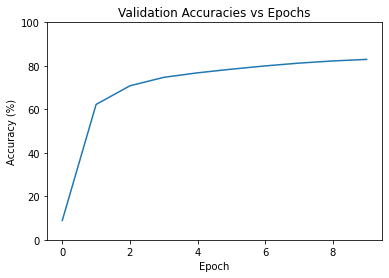

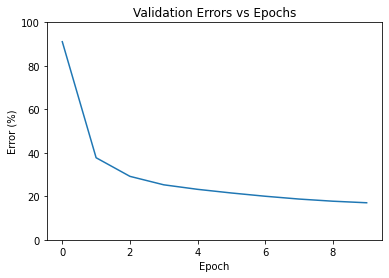

In [1]:
#1.2 Simple
from keras.datasets import mnist
import keras
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(1337)


def sigmoid(x):
    """ Sigmoid activation function
    :param x: layer vector
    :return: calculated value
    """
    return 1 / (1 + np.exp(-x))    

def sigmoid_gradient(x):
    """ Derivative of sigmoid activation function
    :param x: layer vector
    :return: calculated value
    """
    sigmoid_value = sigmoid(x)
    return sigmoid_value*(1-sigmoid_value)

def softmax(x):
    """ Softmax activation function
    :param x: layer vector
    :return: calculated value
    """
    exponents = np.exp(x - x.max()) # - x max to avoid Nan and inf values in numpy
    return exponents / np.sum(exponents, axis = 0)

def softmax_gradient(x):
    """ Derivative of softmax activation function
    :param x: layer vector
    :return: calculated value
    """
    softmax_value = softmax(x)
    return softmax_value*(1-softmax_value) # assuming i=j for simplicity
    

def forward_propagation(x, hidden_weights, output_weights): 
    """ Performs forward propagation through the network to find the output weights and activations of the current iteration
    :param x: layer vector
    :param hidden_weights: current hidden weights
    :param output_weights: current output weights
    :return: new hidden and output weights
    """

    #input layer to hidden layer
    output = {}
    output['hidden_weights'] = x.dot(hidden_weights)
    output['hidden_activation'] = sigmoid(output['hidden_weights'])

    #hidden layer to output layer
    output['output_weights'] = output['hidden_activation'].dot(output_weights)
    output['output_activation'] = softmax(output['output_weights'])
   
    return output

def backward_propagation(x, labels, output, output_weights): 
    """ Performs the necessary weight adjustments to be used in the gradient descent of the hidden and output layers
    :param x: layer vector
    :param labels: ground truths (label vector)
    :param output: dictionary containing current hidden and output activations
    :param output_weights: current output weights
    :return: adjusted hidden and output weights
    """ 
    weight_adjustments = {}

    # update output weights
    error=2*(output['output_activation']-labels) / output['output_activation'].shape[0]*softmax_gradient(output['output_weights'])
    weight_adjustments['output'] = np.matmul(output['hidden_activation'], error)
    
    # update hidden weights
    error=((output_weights).dot(error.T)).T*sigmoid_gradient(output['hidden_weights'])
    weight_adjustments['hidden']= np.matmul(x.T, error)

    return weight_adjustments



def get_sample(train_X, train_y): 
    """ Obtains a batch of 128 random samples from train_X transformed 28x28 pixel images into 1x784 pixel images along with corresponding y and its labels transformed into a 1x10 array
    :param train_X: training set
    :param train_y: label vector
    :return: batch of training set, corresponding label vector its one hot encoded representation
    """
    max_idx = train_X.shape[0]
    input_neurons = np.random.randint(0,max_idx,size=128) # 128 random sample for the input neurons
    x = train_X[input_neurons].reshape((-1,784)) # flatten x into 128 samples of 784 pixels
    y = train_y[input_neurons] # obtain corresponding y values for samples
    labels = np.zeros((len(y),10), np.float32) # create vector of all zeros for each label
    labels[range(labels.shape[0]), y] = 1 # set correponding column to be a 1 in each new row

    return x, y, labels # return new x, y and label samples


def gradient_descent(old_hidden_weights, old_output_weights, hidden_weight_adjustments, output_weight_adjustments, learning_rate): 
    """ Finds the updated hidden and output weights using the learning_rate hyperparameter
    :param old_hidden_weights: previous hidden weights
    :param old_output_weights: previous output weights
    :param hidden_weight_adjustments: new hidden weights
    :param output_weight_adjustments: new output weights
    :param learning_rate: hyperparameter
    :return: new hidden weights, new output weights
    """

    new_hidden_weights = old_hidden_weights - learning_rate * hidden_weight_adjustments
    new_output_weights = old_output_weights - learning_rate * output_weight_adjustments

    return new_hidden_weights, new_output_weights

def fit(train_X, train_y, test_X, test_y):
    """ Fits the training set to a single hidden layer neural network, using the testing set as validation
    :param train_X: training set
    :param train_y: label vector
    :param test_X: testing set
    :param test_y: label vector
    :return: accuracies, errors, validation_predictions, hidden_weights, output_weights
    """
    
    num_iterations=10000 # 1000 iterations = 1 epoch
    curr_epoch = 1
    learning_rate=0.001 #hyperparameter

    num_input = 28 * 28 # number of neurons in the input layer = 784
    num_hidden = 128 # number of neurons in the hidden layer = 128
    num_output = 10 # number of neurons in the output layer = 10

    # initialize hidden and output weights to be randomized, small values
    hidden_weights = (np.random.randn(num_input, num_hidden) / np.sqrt(num_input*num_hidden)).astype(np.float64)
    output_weights = (np.random.randn(num_hidden, num_output)  / np.sqrt(num_output*num_hidden)).astype(np.float64)

    # flatten each 28x28 pixel image into 784 pixels
    train_X = train_X.reshape(train_X.shape[0], 784) 
    test_X = test_X.reshape(test_X.shape[0], 784) 

    # lists to record the metrics of each epoch
    accuracies = []
    errors = []

    for i in range(num_iterations):
        x, y, labels = get_sample(train_X, train_y) # get batch of 128 samples of x with corresponding label y
        
        output = forward_propagation(x,  hidden_weights, output_weights)
        weight_adjustments = backward_propagation(x, labels, output, output_weights)
        hidden_weights, output_weights = gradient_descent(hidden_weights, output_weights, weight_adjustments['hidden'], weight_adjustments['output'], learning_rate)
        
    
        if(i % 1000 == 0): # 1 epoch is 1000 iterations
            training_predictions = np.argmax(output['output_activation'],axis=1) #find columns with highest probability
            training_acc = (training_predictions == y).mean() * 100.0 # find average accuracy
            training_err = 100 - training_acc 

        
            testing_set = test_X.reshape((-1,784)) #flatten test data set
            validation_predictions = np.argmax(softmax(np.dot(sigmoid(np.dot(testing_set, hidden_weights)), output_weights)) ,axis=1)  # Propogate the validation set thru and compare its results with actual results

            validation_acc = (validation_predictions == test_y).mean() * 100.0 # find average accuracy
            validation_err = 100 - validation_acc 
            
            # record epoch metrics for plotting later
            accuracies.append(validation_acc)
            errors.append(validation_err)
            print("Epoch " + str(curr_epoch) + "/10: Training Accuracy: " + str(training_acc) +"% Training Error: " + str(training_err) + "% Validation Accuracy: " + str(validation_acc) + "% Validation Error: " + str(validation_err) + "%")
            curr_epoch += 1
    return accuracies, errors, validation_predictions, hidden_weights, output_weights


# Main program

(train_X, train_y), (test_X, test_y) = mnist.load_data()
print(train_X.shape)

accuracies, errors, validation_predictions, hidden_weights, output_weights = fit(train_X, train_y, test_X, test_y) # train the neural network
original_test_X = test_X # store for 1.7
original_test_y = test_y # store for 1.7

# Plot test data accuracies and errors
plt.ylim(0, 100)
plt.title("Validation Accuracies vs Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.plot(accuracies)
plt.show()


plt.ylim(0, 100)
plt.title("Validation Errors vs Epochs")
plt.xlabel("Epoch")
plt.ylabel("Error (%)")
plt.plot(errors)
plt.show()


model1_misclassified = np.where(original_test_y != validation_predictions)[0]# store for 1.7




1.2 Simple

The neural network increases in accuracy as the number of gradient descent iterations and epochs increase. Likewise, the error percentages decrease as the number of gradient descent iterations and epochs increase. It was also determined that the best value for the hyperparameter learning_rate was 0.001 of the set {0.001, 0.01, 0.1}.

In [ ]:
#1.3 Keras
from keras.datasets import mnist
import keras
import numpy as np
from tensorflow.keras.utils import to_categorical

(train_X, train_y), (test_X, test_y) = mnist.load_data()

original_test_X = test_X # store for 1.7
original_test_y = test_y # store for 1.7

model2 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28, 1)), # input layer
    keras.layers.Dense(128, activation='sigmoid'), # hidden layer
    keras.layers.Dense(10, activation="softmax") # output layer
])

model2.compile(loss=keras.losses.CategoricalCrossentropy(),metrics=['accuracy'])

train_y = to_categorical(train_y, 10)
test_y = to_categorical(test_y, 10)

model2.fit(train_X, train_y, batch_size = 784, epochs=10, validation_data=(test_X, test_y))

model2_misclassified = np.where(original_test_y != np.argmax(model2.predict(original_test_X), axis=-1))[0] # store for 1.7


Epoch 1/10
77/77 [==============================] - 30s 24ms/step - loss: 0.2824 - accuracy: 0.5710 - val_loss: 0.1195 - val_accuracy: 0.8716
Epoch 2/10
77/77 [==============================] - 1s 13ms/step - loss: 0.1050 - accuracy: 0.8818 - val_loss: 0.0764 - val_accuracy: 0.9002
Epoch 3/10
77/77 [==============================] - 1s 13ms/step - loss: 0.0729 - accuracy: 0.9026 - val_loss: 0.0627 - val_accuracy: 0.9153
Epoch 4/10
77/77 [==============================] - 1s 13ms/step - loss: 0.0591 - accuracy: 0.9161 - val_loss: 0.0526 - val_accuracy: 0.9200
Epoch 5/10
77/77 [==============================] - 1s 13ms/step - loss: 0.0521 - accuracy: 0.9232 - val_loss: 0.0483 - val_accuracy: 0.9273
Epoch 6/10
77/77 [==============================] - 1s 14ms/step - loss: 0.0468 - accuracy: 0.9317 - val_loss: 0.0455 - val_accuracy: 0.9311
Epoch 7/10
77/77 [==============================] - 1s 14ms/step - loss: 0.0436 - accuracy: 0.9365 - val_loss: 0.0426 - val_accuracy: 0.9358
Epoch 8/10
7

1.3 Keras

The Keras model (model2) performs better than the neural network made form scratch (model1). Model1 has a validation accuracy of ~82% while model2 has a validation accuracy of ~94%. Model2 also trains a little bit faster than model1.

In [ ]:
#1.4 ReLU
from keras.datasets import mnist
import keras
import numpy as np
from tensorflow.keras.utils import to_categorical

(train_X, train_y), (test_X, test_y) = mnist.load_data()

original_test_X = test_X # store for 1.7
original_test_y = test_y # store for 1.7


model3 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28, 1)), #input layer
    keras.layers.Dense(128, activation='relu'), #hidden layer
    keras.layers.Dense(10, activation="softmax") #output layer
])

model3.compile(loss=keras.losses.CategoricalCrossentropy(), metrics=['accuracy'])

train_y = to_categorical(train_y, 10)
test_y = to_categorical(test_y, 10)

model3.fit(train_X, train_y, batch_size = 784, epochs=10, validation_data=(test_X, test_y))

model3_misclassified = np.where(original_test_y != np.argmax(model3.predict(original_test_X), axis=-1))[0] # store for 1.7

Epoch 1/10
77/77 [==============================] - 3s 17ms/step - loss: 6.7810 - accuracy: 0.5697 - val_loss: 0.6682 - val_accuracy: 0.8907
Epoch 2/10
77/77 [==============================] - 1s 12ms/step - loss: 0.6017 - accuracy: 0.8917 - val_loss: 0.3089 - val_accuracy: 0.9310
Epoch 3/10
77/77 [==============================] - 1s 13ms/step - loss: 0.3027 - accuracy: 0.9287 - val_loss: 0.2330 - val_accuracy: 0.9361
Epoch 4/10
77/77 [==============================] - 1s 13ms/step - loss: 0.1879 - accuracy: 0.9458 - val_loss: 0.2220 - val_accuracy: 0.9346
Epoch 5/10
77/77 [==============================] - 1s 13ms/step - loss: 0.1488 - accuracy: 0.9535 - val_loss: 0.1465 - val_accuracy: 0.9488
Epoch 6/10
77/77 [==============================] - 1s 12ms/step - loss: 0.1019 - accuracy: 0.9620 - val_loss: 0.1331 - val_accuracy: 0.9532
Epoch 7/10
77/77 [==============================] - 1s 13ms/step - loss: 0.0743 - accuracy: 0.9704 - val_loss: 0.1167 - val_accuracy: 0.9558
Epoch 8/10
77

1.4 ReLU

The Keras model (model3) using the ReLU activation function performs slightly better than the previous model2 that used the sigmoid activation function. Model3 has a validation accuracy of ~96% while model2 has a validation accuracy of ~94%. Model3 seemed top train in the same amount of time as model2.

In [ ]:
#1.5 Dropout
from keras.datasets import mnist
import keras
import numpy as np
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import GridSearchCV, KFold
from keras.wrappers.scikit_learn import KerasClassifier

(train_X, train_y), (test_X, test_y) = mnist.load_data()

original_test_X = test_X # store for 1.7
original_test_y = test_y # store for 1.7

train_y = to_categorical(train_y, 10)
test_y = to_categorical(test_y, 10)


def neural_network(dropout_rate, l2_regularizer):
    model = keras.Sequential([
        keras.layers.Flatten(input_shape=(28, 28, 1)), #input layer
        keras.layers.Dropout(dropout_rate),
        keras.layers.Dense(128, activation='sigmoid'), #hidden layer1
        keras.layers.Dropout(dropout_rate),
        keras.layers.Dense(64, activation='relu'), #hidden layer2
        keras.layers.Dropout(dropout_rate),
        keras.layers.Dense(32, activation='relu'), #hidden layer3
        keras.layers.Dropout(dropout_rate),
        keras.layers.Dense(10, activation="softmax", kernel_regularizer=keras.regularizers.l2(l2_regularizer), bias_regularizer=keras.regularizers.l2(l2_regularizer)) #output layer
        
    ])
    model.compile(loss=keras.losses.CategoricalCrossentropy(), metrics=['accuracy'])
    return model


dropout_hyperparams = [0.0, 0.2, 0.5]
l2_hyperparams = [0.0, 0.2, 0.5]

param_grid = dict(dropout_rate=dropout_hyperparams, l2_regularizer = l2_hyperparams)

tuning_model = KerasClassifier(build_fn=neural_network, batch_size=784, epochs=10, verbose=0,)
models = GridSearchCV(estimator = tuning_model, param_grid = param_grid, cv = KFold(2), verbose=10)
print("Running all 9 combinations of hyperparamters for 2 folds -> this will take a few minutes...")
print()
results = models.fit(train_X, train_y)
best_dropout = results.best_params_['dropout_rate']
best_l2 = results.best_params_['l2_regularizer']

print("After tuning the hyperparamters, the best hyperparamters are:")
print("Dropout Value: " + str(best_dropout))
print("L2 Regularization Value: " + str(best_l2))
print()

print("Fit model with best hyperparameters for 1.7")
model4 = neural_network(best_dropout, best_l2)
model4.fit(train_X, train_y, batch_size = 784, epochs=10, validation_data=(test_X, test_y))

model4_misclassified = np.where(original_test_y != np.argmax(model4.predict(original_test_X), axis=-1))[0] # store for 1.7

Running all 9 combinations of hyperparamters for 2 folds -> this will take a few minutes...

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV 1/2; 1/9] START dropout_rate=0.0, l2_regularizer=0.0........................
[CV 1/2; 1/9] END dropout_rate=0.0, l2_regularizer=0.0;, score=0.932 total time=   8.6s
[CV 2/2; 1/9] START dropout_rate=0.0, l2_regularizer=0.0........................
[CV 2/2; 1/9] END dropout_rate=0.0, l2_regularizer=0.0;, score=0.926 total time=   7.5s
[CV 1/2; 2/9] START dropout_rate=0.0, l2_regularizer=0.2........................
[CV 1/2; 2/9] END dropout_rate=0.0, l2_regularizer=0.2;, score=0.909 total time=   7.4s
[CV 2/2; 2/9] START dropout_rate=0.0, l2_regularizer=0.2........................
[CV 2/2; 2/9] END dropout_rate=0.0, l2_regularizer=0.2;, score=0.912 total time=   8.0s
[CV 1/2; 3/9] START dropout_rate=0.0, l2_regularizer=0.5........................
[CV 1/2; 3/9] END dropout_rate=0.0, l2_regularizer=0.5;, score=0.895 total time=   7.7s
[C

1.5 Dropout

After adding 3 hidden layers and using cross-validation with different values for L2 regularization and dropout, it was determined that the best pair of hyperparameters was when the L2 regularization value was 0 and the dropout value was 0. In fact, the best model's (model4) accuracy and error rates were worse than the previous models with a validation accuracy of ~94%

In [2]:
#1.6 Convolution
from keras.datasets import mnist
import keras
import numpy as np
from tensorflow.keras.utils import to_categorical

(train_X, train_y), (test_X, test_y) = mnist.load_data()

original_test_X = test_X # store for 1.7
original_test_y = test_y # store for 1.7
print(train_X.shape)

model5_train_X = np.expand_dims(train_X, 3)
model5_test_X = np.expand_dims(test_X, 3)
print(model5_train_X.shape)


train_y = to_categorical(train_y, 10)
test_y = to_categorical(test_y, 10)


model5 = keras.Sequential([
    keras.layers.InputLayer(input_shape=(28, 28, 1)), #input layer
    keras.layers.Conv2D(32, kernel_size=10, activation='relu'), #convolutional layer
    keras.layers.MaxPooling2D(pool_size=2), # pooling layer
    keras.layers.Flatten(input_shape=(28, 28, 1)), # reshape
    keras.layers.Dense(128, activation='relu'), # fully connected layer
    keras.layers.Dense(10, activation="softmax") #output layer
])

model5.compile(loss=keras.losses.CategoricalCrossentropy(), metrics=['accuracy'])

model5.fit(model5_train_X, train_y, batch_size = 784, epochs=10, validation_data=(model5_test_X, test_y))

model5_misclassified = np.where(original_test_y != np.argmax(model5.predict(model5_test_X), axis=-1))[0] # store for 1.7


(60000, 28, 28)
(60000, 28, 28, 1)
Epoch 1/10
77/77 [==============================] - 34s 272ms/step - loss: 3.3530 - accuracy: 0.5849 - val_loss: 0.0548 - val_accuracy: 0.9337
Epoch 2/10
77/77 [==============================] - 17s 213ms/step - loss: 0.0354 - accuracy: 0.9576 - val_loss: 0.0195 - val_accuracy: 0.9749
Epoch 3/10
77/77 [==============================] - 18s 230ms/step - loss: 0.0151 - accuracy: 0.9822 - val_loss: 0.0145 - val_accuracy: 0.9821
Epoch 4/10
77/77 [==============================] - 16s 207ms/step - loss: 0.0078 - accuracy: 0.9908 - val_loss: 0.0138 - val_accuracy: 0.9840
Epoch 5/10
77/77 [==============================] - 18s 235ms/step - loss: 0.0052 - accuracy: 0.9942 - val_loss: 0.0134 - val_accuracy: 0.9830
Epoch 6/10
77/77 [==============================] - 20s 256ms/step - loss: 0.0035 - accuracy: 0.9963 - val_loss: 0.0142 - val_accuracy: 0.9842
Epoch 7/10
77/77 [==============================] - 21s 277ms/step - loss: 0.0026 - accuracy: 0.9970 - val_

1.6 Convolution

After adding 3 hidden layers that consisted of a convolutional layer, pooling layer and a full connected layer, the validation accuracy was extremely high (the highest yet) at ~98%, The hyperparameters where chosen based on the pooling layer; as the pool size was increased, the accuracy of the model decreased. The most optimal value for the pooling layers pool size was found to be 2.

Actual Class: 8
Model1 Predicted Class: 3
Model2 Predicted Class: 2
Model3 Predicted Class: 2
Model4 Predicted Class: 2
Model5 Predicted Class: 2


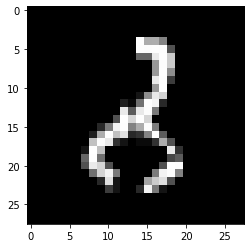



Actual Class: 2
Model1 Predicted Class: 1
Model2 Predicted Class: 8
Model3 Predicted Class: 8
Model4 Predicted Class: 8
Model5 Predicted Class: 7


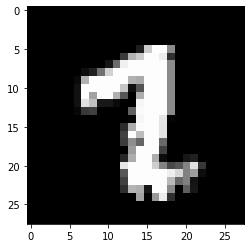



Actual Class: 2
Model1 Predicted Class: 7
Model2 Predicted Class: 7
Model3 Predicted Class: 7
Model4 Predicted Class: 7
Model5 Predicted Class: 7


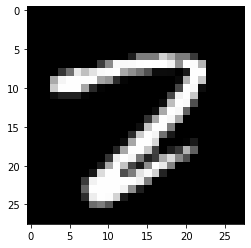



Actual Class: 8
Model1 Predicted Class: 1
Model2 Predicted Class: 9
Model3 Predicted Class: 9
Model4 Predicted Class: 9
Model5 Predicted Class: 9


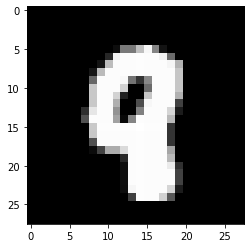



Actual Class: 6
Model1 Predicted Class: 0
Model2 Predicted Class: 0
Model3 Predicted Class: 0
Model4 Predicted Class: 0
Model5 Predicted Class: 0


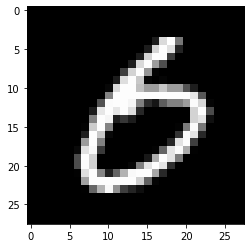



Actual Class: 6
Model1 Predicted Class: 0
Model2 Predicted Class: 5
Model3 Predicted Class: 5
Model4 Predicted Class: 5
Model5 Predicted Class: 5


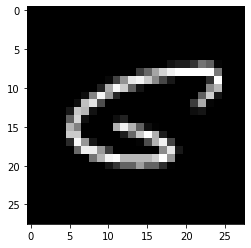



Actual Class: 4
Model1 Predicted Class: 6
Model2 Predicted Class: 6
Model3 Predicted Class: 6
Model4 Predicted Class: 6
Model5 Predicted Class: 6


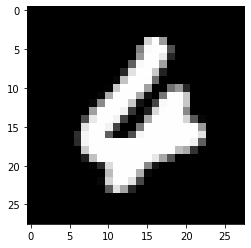



Actual Class: 7
Model1 Predicted Class: 1
Model2 Predicted Class: 2
Model3 Predicted Class: 2
Model4 Predicted Class: 2
Model5 Predicted Class: 2


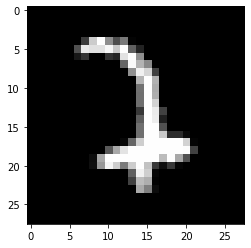



Actual Class: 9
Model1 Predicted Class: 6
Model2 Predicted Class: 4
Model3 Predicted Class: 6
Model4 Predicted Class: 4
Model5 Predicted Class: 1


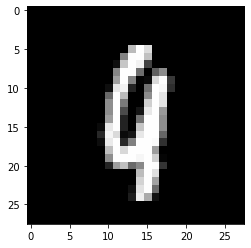

In [ ]:
#1.7 Mugshots
import matplotlib.pyplot as plt
from functools import reduce

# find images that were miss classified by all 5 models
misclassified_images = reduce(np.intersect1d, (model1_misclassified, model2_misclassified, model3_misclassified, model4_misclassified, model5_misclassified))

# print 9 of the missclassified images
for i in range(9):
    plt.imshow(test_X[misclassified_images[i]], cmap='gray')
    image_idx = test_X[misclassified_images[i]].reshape((-1,784))
    
    #Find each model's prediction given the misclassification
    model1_prediction = np.argmax(sigmoid(image_idx.dot(hidden_weights)).dot(output_weights),axis=1)[0]
    model2_prediction = np.argmax(model2.predict(image_idx), axis=-1)[0]
    model3_prediction = np.argmax(model3.predict(image_idx), axis=-1)[0]
    model4_prediction = np.argmax(model4.predict(image_idx), axis=-1)[0]
    model5_prediction = np.argmax(model5.predict(model5_test_X[np.expand_dims(misclassified_images[i], -1)]), axis=-1)[0]
  
    actual_class = np.argmax(test_y[misclassified_images[i]], axis=-1) 
    print("Actual Class: "+ str(actual_class))
    print("Model1 Predicted Class: " +  str(model1_prediction))
    print("Model2 Predicted Class: " +  str(model2_prediction))
    print("Model3 Predicted Class: " +  str(model3_prediction))
    print("Model4 Predicted Class: " +  str(model4_prediction))
    print("Model5 Predicted Class: " +  str(model5_prediction))
    plt.show()
    print()
    print()



1.7 Mugshot

For most of these images, I would personally have to guess what they are. Some of them can kind of be made out but other images I am completely unsure about. This goes to show how accurate some of the models are and that they are able to make good second-best predictions even when the first prediction was incorrect.